# Respuesta a una entrada en escalón

Para un escalón de altura $A$ y un sistema de primer orden la salida
$y(s)$ es: 

```{math}
:label: primer_orden
y (s) = \frac{A}{s}  \frac{K_p}{\tau_p s + 1}
```

En tiempo real, invirtiendo las transformadas de Laplace, se obtiene:

```{math}
:label: primer_orden_real
y (t) = A K_p  \left( 1 - \mathrm{e}^{-\frac{t}{\tau_p}} \right)
```
  
Podemos reproducir este cálculo utilizando Sympy. Como es habitual, empezamos definiendo las variables necesarias y cargando las librerías que vamos a utilizar:

In [1]:
using SymPy, Plots, Markdown, LaTeXStrings, Printf

# Definimos las variables de nuestro sistema
t, A, Kp = symbols("t A K_p", real=True)

# Especificamos que la constante de tiempo es siempre positiva
τp = symbols("tau_p", positive=True)
s = symbols("s");

Definición de la función de transferencia del proceso, $G(s)$:

In [2]:
G = Kp/(τp*s + 1)

   Kₚ   
────────
s⋅τₚ + 1

La función de entrada es un escalón de altura $A$, $f(s)$:

In [3]:
f = A/s

A
─
s

Por lo tanto, la respuesta del proceso $y(s)$ es:

In [4]:
y_s = G*f

    A⋅Kₚ    
────────────
s⋅(s⋅τₚ + 1)

Realizando la transformada inversa de Laplace de $y(s)$ obtenemos la respuesta del proceso en tiempo real, $y(t)$:

In [5]:
y = sympy.inverse_laplace_transform(y_s, s, t)

     ⎛ t     ⎞  -t      
     ⎜ ──    ⎟  ───     
     ⎜ τₚ    ⎟   τₚ     
A⋅Kₚ⋅⎝ℯ   - 1⎠⋅ℯ   ⋅θ(t)

Representando la función en coordenadas adimensionales, $\frac{y(t)}{A K_p}$ frente a $\frac{t}{\tau_p}$, se obtiene la típica salida de un sistema de primer orden:

```{figure} ./img/0.png
---
figclass: margin
align: left
---
Respuesta de un sistema de primer orden a una entrada en escalón de altura $A$.
```

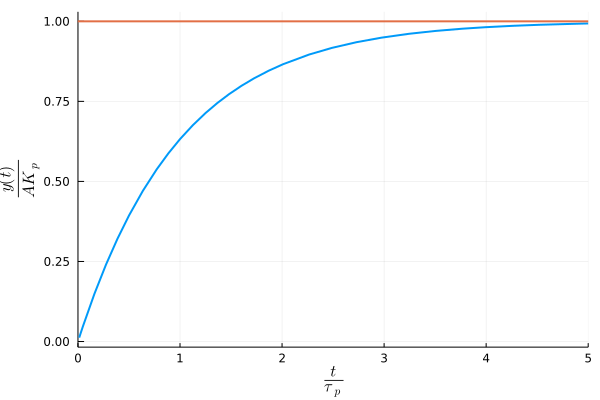

In [6]:
plot(y(A=>1, Kp=>1, τp=>1), xlim=(0,5),
    ylabel=L"$\frac{y(t)}{A K_p}$", xlabel=L"$\frac{t}{\tau_p}$",
    label="", lw=2)
hline!([1], lw=2, label="")

## Propiedades de un sistema de primer orden

Cabe destacar las siguientes características de cualquier sistema de
primer orden:

### Autorregulación:

El proceso alcanza un nuevo estado estacionario sin necesidad de un sistema de control.

Se puede comprobar de manera sencilla observando el gráfico anterior. Se puede comprobar que la respuesta a tiempos largos se encuentra acotada o que tiende a un valor concreto.

### Velocidad de la respuesta

Para calcular la velocidad de la respuesta hay que encontrar la pendiente de la respuesta:

$$\frac{\mathrm{d}\left[ \frac{y (t)}{A K_p} \right]}{\mathrm{d}t} = \frac{1}{\tau_p} e^{- \frac{t}{\tau_p}}$$ 
         
Para $t=0$:
        
$$\frac{\mathrm{d}\left[ \frac{y (t)}{A K_p} \right]}{\mathrm{d}t} = \frac{1}{\tau_p}$$ 
         
Cuanto mayor sea $\tau_p$, menor será la pendiente inicial de la respuesta del sistema y mayor será el tiempo necesario en alcanzar el nuevo estado estacionario.
    

Evaluando al ecuación [\[ec:primer orden real\]](#ec:primer orden real){reference-type="ref"    reference="ec:primer orden real"} para diferentes tiempo se obtiene la siguiente tabla:
    
```{table} Evolución de la salida de un sistema de primer orden con el tiempo.
    
| Tiempo transcurrido | $1 \tau_p$ | $2 \tau_p$ | $3 \tau_p$  | $4 \tau_p$ |
|---------------------|------------|------------|-------------|------------|
| $y(t)$ como porcentaje de su valor estacionario | 63.2 | 86.5 | 95.0 | 98.2 |
```
    
El cálculo de estos valores es muy sencillo:

In [7]:
# Calculamos los valores de y(t) para 0, 1, 2, 3 y 4
for τ ∈ 1:4
    # Mostramos los valores expresados como %
    output = y(A=>1, Kp=>1, τp=>1, t=>τ)*100
    @printf "%.1f" output
    println()
end

63.2
86.5
95.0
98.2


Transcurrido cuatro veces la constante de tiempo del proceso se puede asegurar que ha llegado el sistema al nuevo estado estacionario.

### Nuevo estado estacionario

La salida del proceso en el nuevo estado estacionario es:

$$\lim_{t \to \infty} y (t) = A K_p$$

Podemos comprobar

In [8]:
limit(y, t, oo)

A⋅Kₚ

Cuanto mayor es la ganancia menor debe ser la entrada del sistema (perturbación) para producir el mismo efecto final.

Puede ocurrir que la constante $a_0$ de la ecuación {eq}`ode1` sea nula. Este tipo de procesos se conocen como *integradores puros* ya que la salida es la integral de la entrada con el tiempo. Estos procesos pueden ser difíciles de controlar debido a que no presentan autorregulación. Ejemplos comunes de este tipo de sistemas son los
tanques con líquidos, depósitos de gases y sistemas de almacenamiento de materias primas y productos.